# Численное решение уравнения переноса с использование технологии MPI

## Лабораторная работа №1 по курсу Параллельное программирование

Конкс Эрик Б01-818

$$\begin{cases}\frac{\partial u}{\partial t}+2\frac{\partial u}{\partial x}=x+t,\ \ x\in (0,\ 1],\ t\in\ (0,\ 1] \\ u|_{x=0}=e^{-t},\ \ u|_{t=0}=cos(\pi x) \end{cases}$$

### Явная центральная трехточечная схема:
$$(u_m^{k+1}-0.5(u^k_{m+1}+u^k_{m-1}))/\tau + 2(u^k_{m+1}-u^k_{m-1})/2h=f^k_m,k=0...,K-1, m=0,...,M-1$$

Для сходимости $$2t >= h$$

Торетически ускорение в реализованном алгоритме$$S = O(\frac{KM + \frac{K(K-1)}{2}}{K[\frac{K+M-1}{p}]})$$

In [1]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 20)

In [2]:
with open("latency.txt", "r") as f_l:
    (count, latency) = f_l.readline().split(';')
    print(f"При пересылки массива из {count} int'ов задержка: {latency} мс\n")
    
h = np.array([0.001, 0.0001, 0.00001, 0.000005, 0.000002])
seq = np.array([0.025, 0.167, 1.637, 3.322, 8.533])
p = np.array([[0.355, 0.499, 2.501, 4.441, 11.169],
    [0.332, 0.415, 1.250, 2.295, 5.441],
    [0.306, 0.349, 0.855, 1.529, 3.322],
    [0.264, 0.279, 0.657, 1.051, 2.219]])


df = pd.DataFrame({"Шаг по сетке(h) при t=0.001": h, "Последовательный": seq, "1 Процессор": p[0], "2 Процессора": p[1], "3 Процессора": p[2], "4 Процессора": p[3]}).transpose()
print("Таблица замеров времени с помощью утилиты time(real - sys) в секундах")
print(df)
print("\nТаблица ускорения")
df = pd.DataFrame({"Шаг по сетке(h) при t=0.001": h, "1 Процессор": seq/p[0], "2 Процессора": seq/p[1], "3 Процессора": seq/p[2], "4 Процессора": seq/p[3]}).transpose()
print(df)
print("\nТаблица эффективности")
df = pd.DataFrame({"Шаг по сетке(h) при t=0.001": h, "1 Процессор": seq/p[0], "2 Процессора": seq/p[1]/2, "3 Процессора": seq/p[2]/3, "4 Процессора": seq/p[3]/4}).transpose()
print(df)

При пересылки массива из 1024 int'ов задержка: 0.001987 мс

Таблица замеров времени с помощью утилиты time(real - sys) в секундах
                                 0       1        2         3          4
Шаг по сетке(h) при t=0.001  0.001  0.0001  0.00001  0.000005   0.000002
Последовательный             0.025  0.1670  1.63700  3.322000   8.533000
1 Процессор                  0.355  0.4990  2.50100  4.441000  11.169000
2 Процессора                 0.332  0.4150  1.25000  2.295000   5.441000
3 Процессора                 0.306  0.3490  0.85500  1.529000   3.322000
4 Процессора                 0.264  0.2790  0.65700  1.051000   2.219000

Таблица ускорения
                                    0         1         2         3         4
Шаг по сетке(h) при t=0.001  0.001000  0.000100  0.000010  0.000005  0.000002
1 Процессор                  0.070423  0.334669  0.654538  0.748030  0.763990
2 Процессора                 0.075301  0.402410  1.309600  1.447495  1.568278
3 Процессора                

In [3]:
t_s = []
t_p = []
x_s = []
x_p = []
u_s = []
u_p = []
with open("grid_seq.csv", "r") as f_s, open("grid_par.csv", "r") as f_p:
    t_s_line = f_s.readline()
    t_p_line = f_p.readline()
    t_s = t_s_line.split(';')[:-1]
    for i in range(len(t_s)):
        t_s[i] = float(t_s[i])
    
    t_p = t_p_line.split(';')[:-1]
    for i in range(len(t_p)):
        t_p[i] = float(t_p[i])

    x_s_line = f_s.readline()
    x_p_line = f_p.readline()
    x_s = x_s_line.split(';')[:-1]
    for i in range(len(x_s)):
        x_s[i] = float(x_s[i])
        
    x_p = x_p_line.split(';')[:-1]
    for i in range(len(x_p)):
        x_p[i] = float(x_p[i])

    for line in f_s.readlines():
        tmp = line.split(';')[:-1]
        for i in range(len(tmp)):
            tmp[i] = float(tmp[i])
        u_s.append(tmp)
        
    for line in f_p.readlines():
        tmp = line.split(';')[:-1]
        for i in range(len(tmp)):
            tmp[i] = float(tmp[i])
        u_p.append(tmp)

x_s, t_s = np.meshgrid(x_s, t_s)
x_p, t_p = np.meshgrid(x_p, t_p)
u_s = np.array(u_s)
u_p = np.array(u_p)

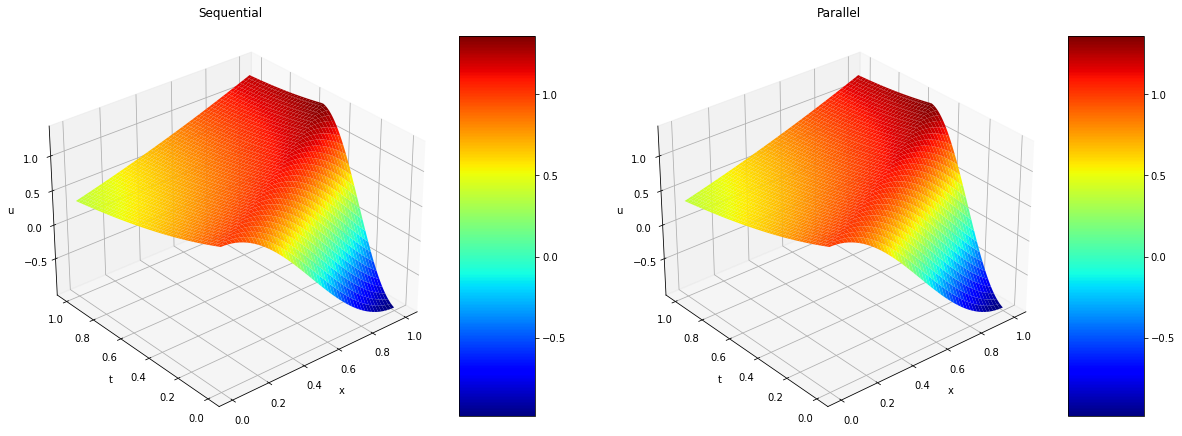

In [4]:
fig, (ax_s, ax_p) = plt.subplots(1, 2, subplot_kw={"projection": "3d"})
surf_s = ax_s.plot_surface(x_s, t_s, u_s, cmap=cm.jet, linewidth=0)
surf_p = ax_p.plot_surface(x_p, t_p, u_p, cmap=cm.jet, linewidth=0)
ax_s.set_xlabel('x')
ax_s.set_ylabel('t')
ax_s.set_zlabel('u')
ax_p.set_xlabel('x')
ax_p.set_ylabel('t')
ax_p.set_zlabel('u')
ax_s.view_init(30, 230)
ax_p.view_init(30, 230)
ax_s.title.set_text("Sequential")
ax_p.title.set_text("Parallel")
fig.colorbar(surf_s, shrink=0.5, aspect=5, ax=ax_s)
fig.colorbar(surf_p, shrink=0.5, aspect=5, ax=ax_p)
plt.show()

1. Ускорение и эффективность параллельных алгоритмов

    Ускорение $$S=\frac{T_1}{T_p}\\T_1\ -\ время\ выполнения\ последовательного\ алгоритма\\T_2\ -\ время\ выполнения\ параллельного\ алгоритма\ на\ p\ процессорах$$
    
    Эффективность $$E=\frac{S}{p}$$

2. Закон Амдаля

    Максималальное ускорение, которое можно получить с помощью алгоритма с долей последовательных операция α от общего объема $$S=\frac{1}{\alpha + \frac{1-\alpha}{p}}$$
    
3. Свойста канала передачи данных. Латентность

    Передача единицы данных через канал передачи данных занимает некоторое время называемой латентностью канала. Соответственно отношение размера данных n к времени передачи t называется пропускной способностью.
    
4. Виды обменов "точка-точка": синхронные, асинхронные. Буферизация данных
    
    Обмены бывают блокирующие и неблокирующие. При блокирующий обмене отправитель останавливается, пока получатель не примет сообщение. В то время получатель тоже останавлен и ждет когда отправитель ему отправит сообщение. При не блокирующем обмене отправитель и получатель выполняют обмен без проверки отправления и доставки.
    
    При буферизованном обмене выделяется память, в которую отправитель копирует свои данные и откуда себе копирует получатель.
    
5. Балансировка загрузки: статическая и динамическая

    Статическая балансировка выполняет распределение вычислительных узлов по процессорам до начала параллельного алгоритма и процесса вычисления.
    
    Динамическая балансировка выполняется в процессе параллельной программе и позволяет менять распределение по процессорам в зависимости от того как меняется обстановка, с целью максимизации использования процессоров.

6. Геометрический параллелизм

    Геометрический параллелизм - метод, в котором задача разбивается на области, которые пересекаются только на границах. Далее эти области распределяются для вычисления по процессорам. Одну область обрабатывает только один процессор
    
7. Конвейерный параллелизм

    Конвейерный параллелизм - метод разбиения выполнения задачи на отдельные небольшие микроэтапы, которые требует только части вычислительного оборудования. Такие микроэтапы ставятся на 'конвейер' и позволяют нагрузить все части вычислительной системы, а значит выполнять сразу несколько задач за тоже время.